In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp 
import seaborn as sns

# Data Files 
ont_housing_cost_path = "/Users/admin/Downloads/ontario_housing_costs_final_2010_2023.csv"

# Read the house data and study the results
ont_housing_cost = pd.read_csv(ont_housing_cost_path)

# Display the data for preview
ont_housing_cost.head()



,Year,Region,Property Type,Average Price,Price Index,Number of Sales,Median Price,Affordability Index
0,2010,Toronto,Condominium,505711,171.518937,885,426382.9,104.488318
1,2010,Toronto,Non-Detached,322579,164.589411,854,320792.1,139.177300
2,2010,Toronto,Semi-Detached,1419160,127.265629,755,1259474.0,131.216873
3,2010,Toronto,Detached,945048,139.278480,587,893548.2,83.739616
4,2010,Ottawa,Condominium,1156308,102.021840,805,998554.2,127.815675


In [258]:
# Create Columns For Each Property Type
property_dummies = pd.get_dummies(ont_housing_cost["Property Type"], prefix='Property')

# Multiply the dummy DataFrame by the Number of Sales column to retain the number of sales values
property_dummies = property_dummies.multiply(ont_housing_cost["Number of Sales"], axis=0)

# Concatenate the property dummies with the original DataFrame
ont_housing_cost = pd.concat([ont_housing_cost, property_dummies], axis=1)

In [259]:
# Rename the last four columns to remove underscores
ont_housing_cost = ont_housing_cost.rename(columns=lambda x: x.replace('_', ' ') if x in ont_housing_cost.columns[-4:] else x)
ont_housing_cost = ont_housing_cost.rename(columns=lambda x: x.replace('Property', ' ') if x in ont_housing_cost.columns[-4:] else x)
# Display the cleaned column names for preview
print(ont_housing_cost.columns)

Index(['Year', 'Region', 'Property Type', 'Average Price', 'Price Index',
       'Number of Sales', 'Median Price', 'Affordability Index',
       '  Condominium', '  Detached', '  Non-Detached', '  Semi-Detached'],
      dtype='object')


In [260]:
ont_housing_cost

,Year,Region,Property Type,Average Price,Price Index,Number of Sales,Median Price,Affordability Index,Condominium,Detached,Non-Detached,Semi-Detached
0,2010,Toronto,Condominium,505711,171.518937,885,426382.9,104.488318,885,0,0,0
1,2010,Toronto,Non-Detached,322579,164.589411,854,320792.1,139.177300,0,0,854,0
2,2010,Toronto,Semi-Detached,1419160,127.265629,755,1259474.0,131.216873,0,0,0,755
3,2010,Toronto,Detached,945048,139.278480,587,893548.2,83.739616,0,587,0,0
4,2010,Ottawa,Condominium,1156308,102.021840,805,998554.2,127.815675,805,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2022,Ottawa,Non-Detached,1113974,106.366574,307,974101.8,53.561343,0,0,307,0
4996,2017,Cambridge,Semi-Detached,1337812,191.076096,750,1242271.9,101.200475,0,0,0,750
4997,2020,Ajax,Non-Detached,1379343,194.655471,643,1208608.1,55.435669,0,0,643,0
4998,2010,Whitby,Condominium,791277,139.232641,551,748119.0,83.139466,551,0,0,0


In [261]:
#find  individual sum of each owned property type
individual_sums = ont_housing_cost.groupby('Property Type')['Number of Sales'].sum().reset_index()

In [262]:
# Show individual sum for each owned property type
print(individual_sums)

   Property Type  Number of Sales
0    Condominium           635463
1       Detached           670308
2   Non-Detached           654731
3  Semi-Detached           643608


In [263]:
# Calculate the total number of properties owned
total_properties_owned = ont_housing_cost['Number of Sales'].sum()

# Display the result
print(f'Total Number of Properties Owned: {total_properties_owned}')

Total Number of Properties Owned: 2604110


   Property Type  Number of Sales
0    Condominium           635463
1       Detached           670308
2   Non-Detached           654731
3  Semi-Detached           643608


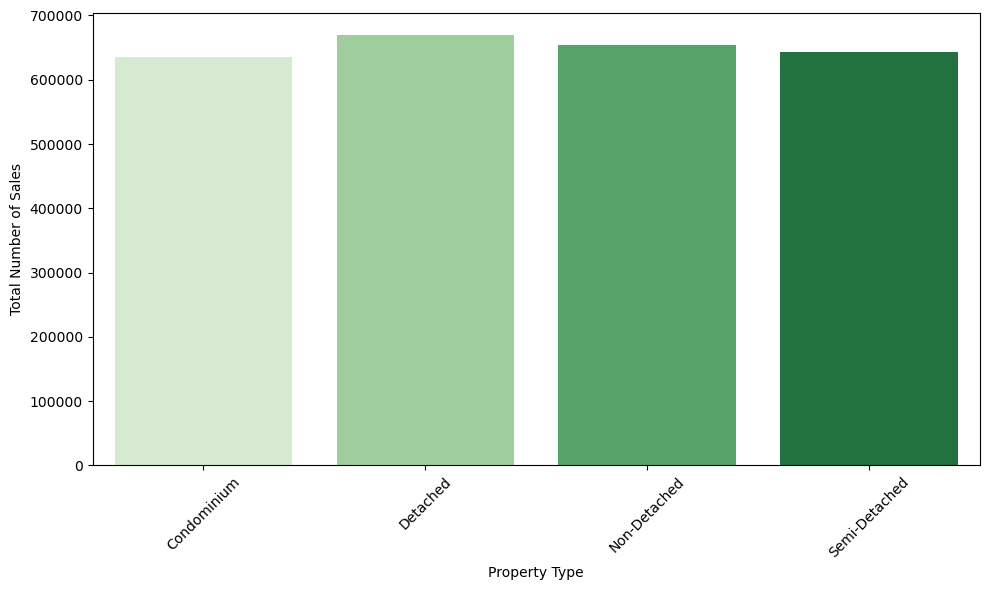

In [264]:

# Assuming the previous steps have been completed and ont_housing_cost is ready

# Group by 'Property Type' and sum the 'Number of Sales'
individual_sums = ont_housing_cost.groupby('Property Type')['Number of Sales'].sum().reset_index()

# Display the individual sums for each property type
print(individual_sums)

# Alternatively, using Seaborn for a more aesthetic plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Property Type', y='Number of Sales', data=individual_sums, hue='Property Type', palette='Greens', legend=False)
plt.xlabel('Property Type')
plt.ylabel('Total Number of Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [265]:
# Define a list of cities
Cities = [
    "Toronto", "Ottawa", "Hamilton", "London", "Mississauga", 
    "Brampton", "Windsor", "Markham", "Kitchener", "Vaughan", 
    "Guelph", "Barrie", "Sudbury", "Kingston", "Thunder Bay", 
    "Waterloo", "Richmond Hill", "Oakville", "Burlington", 
    "Pickering", "Ajax", "Whitby", "Oshawa", "Cambridge", 
    "Niagara Falls"
]

# Display the list of cities
print(Cities)

['Toronto', 'Ottawa', 'Hamilton', 'London', 'Mississauga', 'Brampton', 'Windsor', 'Markham', 'Kitchener', 'Vaughan', 'Guelph', 'Barrie', 'Sudbury', 'Kingston', 'Thunder Bay', 'Waterloo', 'Richmond Hill', 'Oakville', 'Burlington', 'Pickering', 'Ajax', 'Whitby', 'Oshawa', 'Cambridge', 'Niagara Falls']


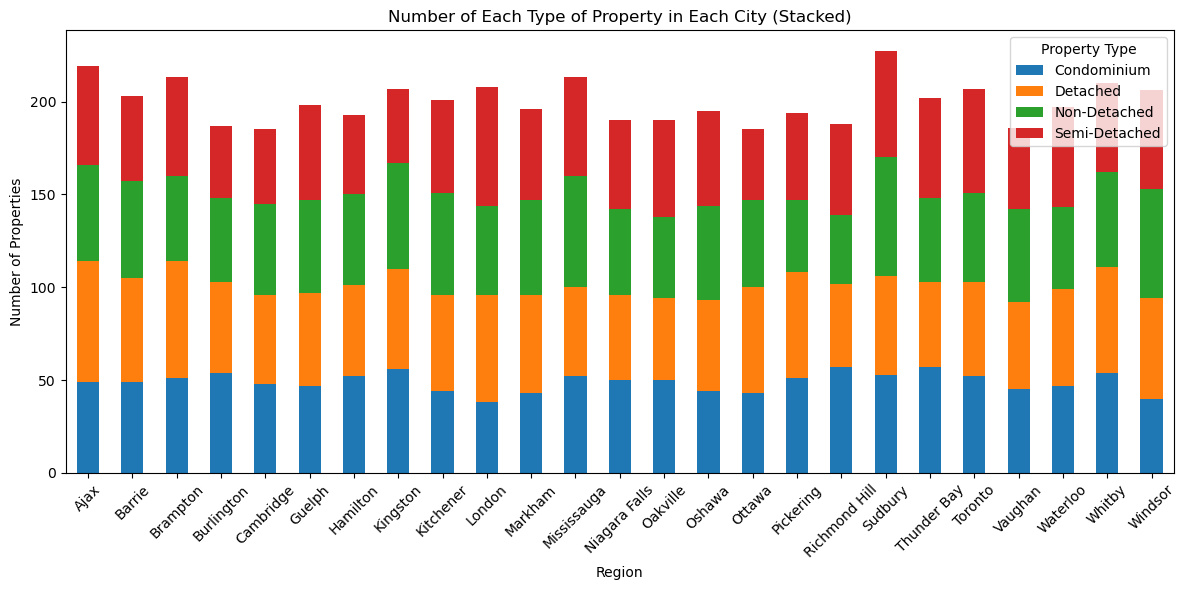

In [266]:
# Step 1: Group the data by city and property type
property_counts = ont_housing_cost.groupby(['Region', 'Property Type']).size().reset_index(name='Counts')

# Step 2: Create a bar plot using Seaborn
property_counts.pivot(index='Region', columns='Property Type', values='Counts').fillna(0).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Each Type of Property in Each City (Stacked)')
plt.xlabel('Region')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()